<a href="https://colab.research.google.com/github/cmannnn/intro_to_ml/blob/main/basic_computer_vision_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import tensorflow as tf
import matplotlib.pyplot as plt
print(f'Using TensorFlow version {tf.__version__}')

Using TensorFlow version 2.3.0


In [ ]:
# loading Fashion MNIST dataset
mnist = tf.keras.datasets.fashion_mnist 
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

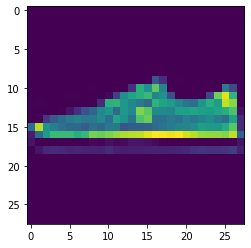

In [ ]:
# showing an image
plt.imshow(training_images[14])
print(training_images[14])
print(f'The training label is {training_labels[14]}')

In [ ]:
# normalizing test and train images
training_images = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
# creating the model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
# building model
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4961 - accuracy: 0.8250
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3780 - accuracy: 0.8633
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3381 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3131 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2952 - accuracy: 0.8910


In [ ]:
# trying model on testing set
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3439 - accuracy: 0.8760


[0.3439457416534424, 0.8759999871253967]

In [ ]:
# exploring classifiers
classifications = model.predict(test_images)

print(classifications[10])

[6.3777290e-05 2.1041399e-06 7.1679264e-02 3.6980538e-08 9.1871887e-01
 1.3863946e-06 9.5284702e-03 1.9036230e-09 3.9120255e-06 2.2222066e-06]


In [ ]:
# actual test label
print(test_labels[10])

4


#Creating a Better Model

In [ ]:
# creating a better model
model_2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                     tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) 

model_2.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

model_2.fit(training_images, training_labels, epochs=5)

model_2.evaluate(test_images, test_labels)

classifications_2 = model_2.predict(test_images)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4700 - accuracy: 0.8309
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3580 - accuracy: 0.8679
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3204 - accuracy: 0.8817
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2941 - accuracy: 0.8906
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3702 - accuracy: 0.8683


In [ ]:
# new model_2 label test
plt.imshow(test_images[73])
print(classifications_2[73])
print(test_labels[73])

NameError: ignored

In [ ]:
# testing without Flatten() layer, therefore error

model_3 = tf.keras.models([tf.keras.layers.Dense(64, activation = tf.nn.relu),
                           tf.keras.layers.Dense(10, activation = tf.nn.softmax)])

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, test_labels, epochs=5)

model.evaluate(test_images, test_labels)

classification_3 = model.predict(test_images)

print(classification_3[14])
print(test_labels[14])

TypeError: ignored

In [ ]:
# testing with changing last output layer from 10 -> 5 

model_4 = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                      tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model_4.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy')

model_4.fit(training_images, training_labels, epochs=5)

model_4.evaluate(test_images, test_labels)

classification_4 = model_4.predict(test_images)

print(classification_4[13])
print(test_labels[13])

Epoch 1/5


InvalidArgumentError: ignored

In [ ]:
# adding another layer

model_5 = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                      tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                      tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model_5.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics='accuracy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classification_5 = model.predict(test_images)

print(classification_5[73])
print(test_labels[73])

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1916
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1852
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1812
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1765
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3843
[1.2642194e-01 2.4144427e-07 2.6954863e-02 1.4130475e-01 8.2258850e-02
 6.7735582e-09 6.1619991e-01 2.7940823e-09 6.8593929e-03 1.2185459e-09]
6
